In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import RNA
from IPython.display import SVG
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from RNA_helper import replace_char_towards_optimal, move_to_optimal, get_initial_guess, get_puzzle, secundary_structures_metric

In [3]:
df_eterna_100 = pd.read_csv('eterna100-puzzles.txt', delimiter='\t')

In [4]:
print('..(.(..((((((....))))))..).)......((((..(((.((((((.(((....)))))....)))))))))))..((((((((....))))))))..')
print(df_eterna_100.loc[4]['Secondary Structure'])

..(.(..((((((....))))))..).)......((((..(((.((((((.(((....)))))....)))))))))))..((((((((....))))))))..
..(.(..((((((....))))))..).)......((((..(((.(((((((((....)))))....)))))))))))..((((((((....))))))))..


In [5]:
df_eterna_100.loc[5, 'Secondary Structure'] = '(((((((((((........)))).((...............))....(((((.......))))))))))))....(((((((..((((........))))(((.............)))....(((((.......))))))))))))....(((((((..((((........))))((((((.......))))))....(((((.......))))))))))))....(((((((..((((........))))((((((.......))))))....(((((.......))))))))))))....(((((((...(((........)))(((((((.......)))))))...(((((.......))))))))))))....'

In [6]:
df_eterna_100.to_csv('eterna100-puzzles.csv', index=False)

In [7]:
# 
solved_puzzles = [0, 1, 2, 3, 7, 9, 10, 12, 16, 18, 19, 20, 21, 23, 25, 27, 31, 32, 39, 41, 42, 44, 45, 47, 52, 53, 54, 83, 84]

# Simple Hairpin

In [9]:
eterna_id = 20111 # Simple Hairpin
eterna_id = 15819 # Prion Pseudoknot - Difficulty Level 0
# secundary_structure, final_sequence = get_puzzle(eterna_id=eterna_id)
# El 5 parece complicado
secundary_structure, final_sequence = get_puzzle(df_eterna_100, idx=0, solution=1)

Simple Hairpin
(((((......)))))
GGGGGGGGGGGCCCCC


In [54]:
f1 = '(((((((((((........)))).((...............))....(((((.......))))))))))))....(((((((..((((........))))(((.............)))....(((((.......))))))))))))....(((((((..((((........))))((((((.......))))))....(((((.......))))))))))))....(((((((..((((........))))((((((.......))))))....(((((.......))))))))))))....(((((((...(((........)))(((((((.......)))))))...(((((.......))))))))))))....'

In [55]:
f2 = '(((((((((((........)))).((...............))....(((((.......))))))))))))....(((((((..((((........))))(((.............)))....(((((.......))))))))))))....(((((((..((((........))))((((((.......))))))....(((((.......))))))))))))....(((((((..((((........))))((((((.......))))))....(((((.......))))))))))))....(((((((..((((........))))((((((.......))))))....(((((.......))))))))))))....'

In [ ]:
'(((((((((((........)))).((...............))....(((((.......))))))))))))....(((((((..((((........))))(((.............)))....(((((.......))))))))))))....(((((((..((((........))))((((((.......))))))....(((((.......))))))))))))....(((((((..((((........))))((((((.......))))))....(((((.......))))))))))))....(((((((...(((........)))(((((((.......)))))))...(((((.......))))))))))))....'
'(((((((((((........)))).((...............))....(((((.......))))))))))))....(((((((..((((........))))(((.............)))....(((((.......))))))))))))....(((((((..((((........))))((((((.......))))))....(((((.......))))))))))))....(((((((..((((........))))((((((.......))))))....(((((.......))))))))))))....(((((((..((((........))))((((((.......))))))....(((((.......))))))))))))....'

In [59]:
len(f1), len(f2)

(379, 379)

In [58]:
secundary_structures_metric(f1, f2)

0.9902912621359223

In [ ]:
filename = 'images/test.svg'
RNA.svg_rna_plot(final_sequence, secundary_structure, filename)
HTML(filename=filename)

In [535]:
# start_sequence = get_initial_guess(secundary_structure, bonds_initial_type='all_As')
start_sequence = get_initial_guess(secundary_structure, bonds_initial_type='low_energy_bonds')
# start_sequence = get_initial_guess(secundary_structure, bonds_initial_type='high_energy_bonds')
print(start_sequence)
energies, free_energies, sequences, sec_struct_metric = move_to_optimal(start_sequence, final_sequence, secundary_structure)

low energy bonds pairs list
GGUUGGUUUGUGGGUAUUUUUAGUAAAAAGUAGUAAAAAGUAGUAAAAAGUAUUAAAAAGGAGGAAAAAUUAGGGGGAGGGAAAAAUUUAGUGGUAUUAAAAAGGAGGAAAAAUUAGUAAAAAGUAGGAAAAAUUAUUAAAAAGGAGUUGUAUGGAAAAAUUGAUUUUUAUGAAAAAUGAUGAAAAAUGAGUAAAAAGUAGUAAAAAGUAGGAAAAAUUAGGGGGAUUUAAAAAGGGAUUGGUAUUAAAAAGGAUGAAAAAUGAGGAAAAAUUAUUAAAAAGGAUGAAAAAUGAGUUGGAUGUAAAAAGUGAUUUGGAGUAAAAAGUAUGAAAAAUGAGGAAAAAUUAGGAAAAAUUAUUAAAAAGGAUUGGGAGUUUGUGGGUUGGUU
Found alternative sequence:784313725490258
GCGCGGCCCGCCCCCACCCCCAGGGAAAACCAGGGAAAACCACCGAAAAGGAGCGAAAAGCAGCGAAAAGCAGGGGGACGGGAAAACCGAGCCGCACCGAAAAGGACCGAAAAGGAGGGAAAACCAGCGAAAAGCAGCGAAAAGCAGCGGCAGCCGAAAAGGCACGCGCACCGAAAAGGAGGGAAAACCAGGAAAAACCAGCGAAAAGCAGCGAAAAGCAGCGCGAGGGGAAAACCCAGGGCCACCGAAAAGGACCGAAAAGGAGGGAAAACCAGCGAAAAGCAGCGAAAAGCAGGCCCAGCGGAAAACGCACCGGCAGGGAAAACCAGGGAAAACCACCGAAAAGGAGCGAAAAGCAGCAAAAAGCAGCCGGAGGGGGCGGGCCGCGC
-152.39999389648438

1.0


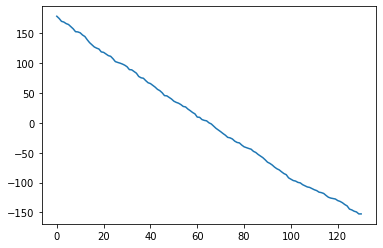

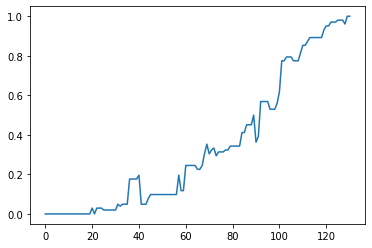

In [536]:
plt.plot(energies)
plt.show()
plt.plot(sec_struct_metric)
plt.show()

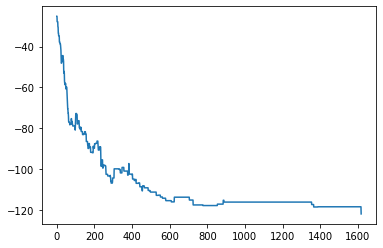

In [413]:
plt.plot(free_energies)
plt.show()

# Shooting Star

In [146]:
Etherna_id = 913357
secundary_structure, final_sequence = get_puzzle_by_id(Etherna_id)

Shooting Star
(((((((((((((((((...(.(..((.(((.(((.((....).))).)))).).)..))..))))))).(((((..(.(..((.(((.(((((.(((.((((.((....).)))).))))).))).)))).).)..))..)(....)..))))(((((((((...))))).(((((...)))))(.(....).).)))).)))).((((.((((...(((((((...))))))).(((((...)))))))))(((((((...))))))).(((((...)))))))))((((..(....)(..(..(..(.(.(((.((((.((....).)))).)))).)..)..).)..))))).)))))).
UAUCGCCCCCGUGACAUAAAGAGUGCCGUGGACCGACCGAAAGCGCGCGCCAGGAGUGCCGGAUGUCACACUCCCUGGACUGGCGAGGACCUGGACAGACCUGACCGAAAGCGCAGCGCUGCGCAGCGCCUGGACUGGCUGGCGAAAGAAGGAGCUCCGCUUAAAAUAAGCACAUACAAAGUAUGGGGGAAACGCAGGAGAGGGGACUGCAGGGGAAAUAUAAAUAAAAUUUAUAAGCUUAAAAUAAGCCCCCCCUUUUAAAAUAAAAGGACCAGGAAACCUGGGCAGGAGCAACGAAAGGUGGUUGUGGAUGAGGACCGGACCGAAAGCGCCGCGCCUGAGGCUGCUCUGCGCUCAGCGAUAA


In [147]:
start_sequence = get_initial_guess(secundary_structure)

In [148]:
energy = RNA.eval_structure_simple(start_sequence, secundary_structure)
energy

57.099998474121094

In [149]:
sec_struct, energy = RNA.fold(start_sequence)
sec_struct

'..((((((((....(((((((.......((((........)))))))))))((((((((...........))))))))....(((((((..((.((.((.(((((((..((((.((((((((...............(((((((((((..........(((((...)))))((((((...)))))).))))))).))))..((((.((((((...((((((((((...))))))))))........(((((((((((....))))))))))))))))).)))).......)).)))))).)))).))))))).)).)).)))))))))...((((..((((...)))).))))..)))))))).'

In [150]:
energy

-125.19999694824219

In [151]:
energies, free_energies, sequences = move_to_optimal(start_sequence, final_sequence, secundary_structure, calc_free_energy=True)

KeyboardInterrupt: 

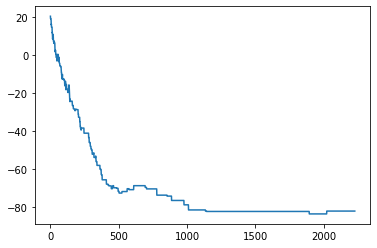

In [133]:
plt.plot(energies)
plt.show()

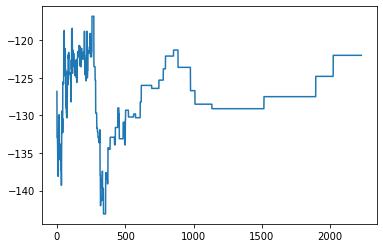

In [134]:
plt.plot(free_energies)
plt.show()